# Tutorial: Time Series Analysis with Pandas
URL: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Author: Jennifer Walker

Date: Janauary 10, 2019

## Table of Contents
* [Time Series Data Structures](#Structures)
* [Creating a Time Series DataFrame](#DataFrame)
* [Time-based Indexing](#Indexing)
* [Visualising Time Series Data](#Visualize)
* [Seasonality](#Seasonality)
* [Frequencies](#Frequencies)
* [Resampling](#Resampling)
* [Rolling Windows](#Windows)
* [Trends](#Trends)

## Time series data structures <a name="Structures"></a>

### Load Libraries

In [2]:
import pandas as pd

### Timestamp

In [3]:
# a single point in time is represented as a Timestamp
# we can use to_datetime() 
## to create Timestamps from a wide variety of strings

pd.to_datetime('2018-10-15 3:45pm')

Timestamp('2018-10-15 15:45:00')

In [4]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

*pandas assumed the above format was month/day/year*

In [5]:
# we can use dayfirst to tell pandas 7 is the date not month
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

### DatetimeIndex

In [6]:
# if you supply a list or array of strings as input to to_datetime()
# returns a sequence in a DatetimeIndex object

pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

*dtype='datatime64[ns]*  

*means that it is stored as 64-bit integers in units of nanoseconds*

**Sequence of strings in the same date/time format**

You can explicitly specify it with 'format' parameter. Saves time, as the alternative is to format each string individually.

Any format codes from 'strftime()' and 'strptime()' functions can be used.

In [7]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## Creating a time series DataFrame <a name="DataFrame"></a>

Let's use the OPSD dataset

**Load the data**

In [8]:
# see shortcut below

opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

**Check DataFrame structure**

In [9]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [10]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [11]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

*The Date column is the correct data type*

**Let's set the Date as the DataFrame's index**

In [12]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


**Shortcut to make dates index by default**

In [13]:
# if the date column is in the proper format use this instead
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

**Add a few more columns**

In [14]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


## Time-based indexing <a name="Indexing"></a>

We can use the loc accessor to intuitively organize and access our data.

**Select a specific date**

In [15]:
opsd_daily.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

**Select a range of dates**

In [16]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


**Partial-string indexing**

In [17]:
# select the entire month of February 2012
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


## Visualizing time series data <a name="Visualize"></a>

**Load Libraries**

In [18]:
# Display figures inline in Jupyter Lab
import matplotlib.pyplot as plt

# Adjust the figures size to an appropriate shape for time series
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

**Line Plot**

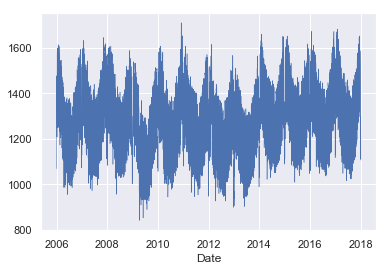

In [19]:
opsd_daily['Consumption'].plot(linewidth=0.5);

Change to dots rather than lines, add other indices

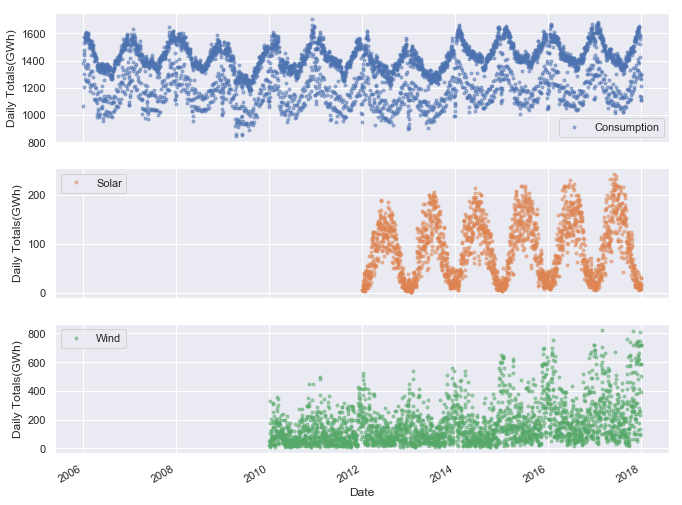

In [20]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', 
                                  alpha = 0.5, 
                                 linestyle='None', 
                                 figsize=(11,9), 
                                 subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals(GWh)')

**Seasonality**

Let's plot the time series in a single year to investigate

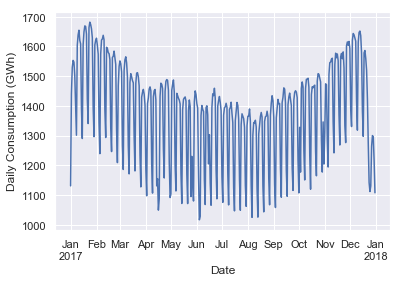

In [21]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

*Can clearly see the weekly oscillations*

Let's zoom in further and look at just January and February

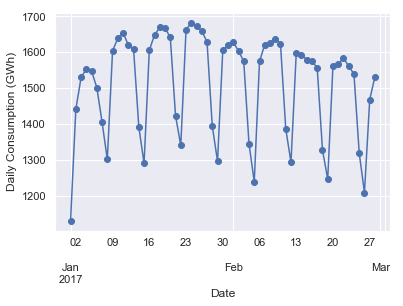

In [22]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');                    

*Can clearly see consumption is highest on weekdays and lowest on weekends*

**Customizing time series plots**

It would be nice to have vertical lines that commence on the week

In [23]:
# Load libraries
import matplotlib.dates as mdates

matplotlib.dates uses date/time ticks differently than plot() so we need to manually customize.

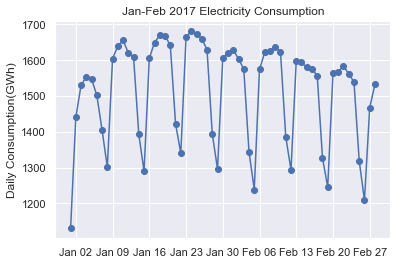

In [24]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption(GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Seasonality <a name="Seasonality"></a>

**Yearly Seasonality**

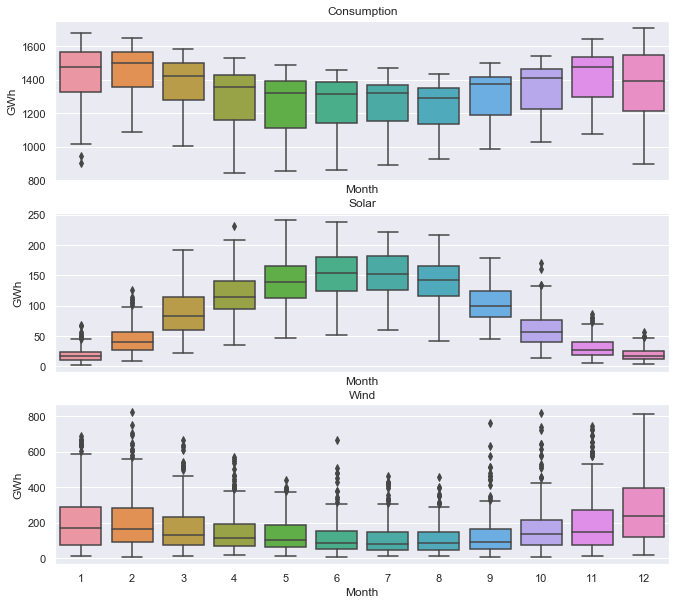

In [25]:
# Group date by month, to visualize yearly seasonality

# create 3 subplots in 1 column, of set size and share x-axis
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

# Create a boxplot for each of ['Consumption', 'Solar','Wind']
for name, ax in zip(['Consumption','Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    
# Remove the auto x-axis label form all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')


**Weekly Seasonality**

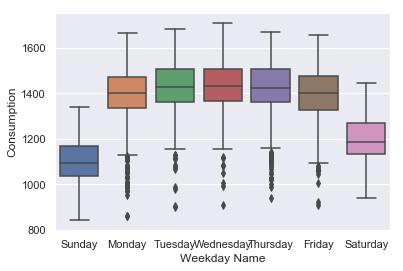

In [26]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

## Frequencies <a name="Frequencies"></a>

When time series are evenly spaced we can look for frequencies

**Daily Frequency**

In [27]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

The resulting DatetimeIndex has an attribute **freq** with a value **'D'**, indicating daily frequecy. 

Available frequencies in pandas:

* Hourly ('H')
* Calendar daily ('D')
* Business daily ('B')
* Weekly ('W')
* Monthly ('M')
* Quaterly ('Q')
* Annual ('A')
* And others: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Frequencies can also be expressed as multiples (e.g., '5D')

**Hourly Frequency**

In [28]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

**What is the frequency of the 'opsd-daily.index'?**

In [29]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

*It has no frequency*

If we know that our data should be a specific frequency, we can use the DataFrame's **asfreq()** method to assign a frequency.

If any date/times are missing, they will be added as **NaN** or filled according to a specified **data filling method** (e.g., forward filling or interpolation).

**Use the asfreq() method on our dataset**

In [30]:
# We need a DatetimeIndex, rather than a string of date/times
times_sample = pd.to_datetime(['2013-02-03','2013-02-06','2013-02-08'])

# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


Now let's convert to a daily frequency

In [31]:
# Convert tthe data to daily frequency without filling missing rows
consum_freq = consum_sample.asfreq('D')

# Create a column with missing rows forward filled
## means last value is repeated
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method = 'ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## Resampling <a name="Resampling"></a>

It is often useful to **resample** time series to lower (downsampling) or higher (upsampling) frequency.

The **resample()** method splits the DatetimeIndex into time bins and groups the data by time bin. We can then apply an aggregation method such as mean(), median(), sum(), etc. to the data group for each time bin.

**Let's resample our data to a weeklymean time series**

In [32]:
# Specify the data columsn we want to include
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Resample the weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [33]:
# compare the number of rows in the two datasets
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


**Let's plot both the daily and weekly time series together**

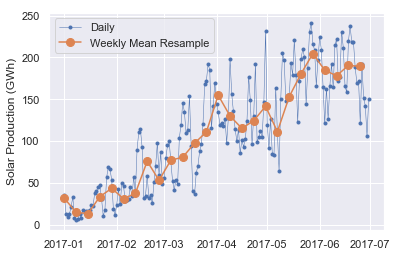

In [34]:
# Start and end of the data range to extract
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
       marker='.',
       linestyle='-',
       linewidth=0.5,
       label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
       marker = 'o',
       markersize = 8,
       linestyle ='-',
       label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')

ax.legend();

**Let's look at the monthly resample**

In [35]:
# Compute the month sums, 
## setting the value to NaN for any month 
## which has fewer than 28 days of data
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


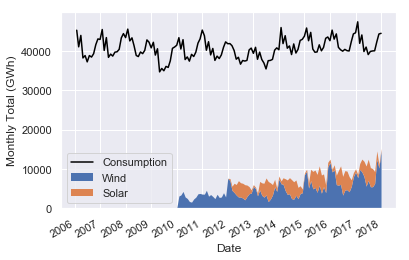

In [36]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'],
       color='black',
       label = 'Consumption')

opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, 
                                         linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())

ax.legend()

ax.set_ylabel('Monthly Total (GWh)');

**Let's explore the relationship between consumption and renewables**

In [37]:
# Compute the annual sums, setting the value to NaN for n < 360
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)

# Let's set the index to the Year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# Compute the ration of Wind+Soalr to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


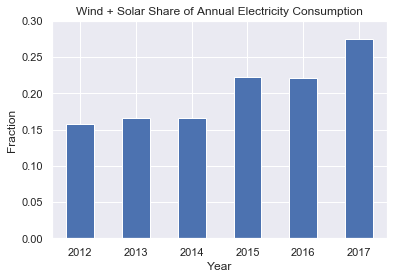

In [38]:
# As a bar chart from 2012 onwards
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0,0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

## Rolling windows <a name="Windows"></a>

Let's use the **rolling()** method to compute the 7-day rolling mean of our daily data. We use **center=True** to label each window at its midpoint.

In [39]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


Let's compare the difference between **resampling** and a **rolling mean** by updating the previous figure.

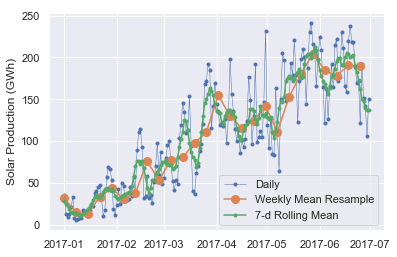

In [40]:
# Start and end of the data range to extract
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
       marker='.',
       linestyle='-',
       linewidth=0.5,
       label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
       marker = 'o',
       markersize = 8,
       linestyle ='-',
       label='Weekly Mean Resample')

ax.plot(opsd_7d.loc[start:end, 'Solar'],
       marker = '.',
       linestyle ='-',
       label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')

ax.legend();

The **rolling mean** follows the daily time series quite well but it is smoother since higher frequency variability has been averaged out.

## Trends <a name="Trends"></a>

An easy way to visualize **trends** is with **rolling means** at different time scales.

Rolling means average out variations at frequencies much higher than the window size and average out any seasonality on a time scale equal to the window size.

Let's look at a 7-day rolling mean and a 365-day rolling mean.

In [41]:
# min_periods argument accounts for missing data
opsd_365d = opsd_daily[data_columns].rolling(window=365, 
                                             center=True,
                                            min_periods=360).mean()

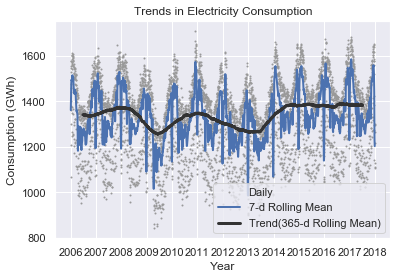

In [43]:
#Plot daily, 7-day rolling, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'],
       marker='.',
       markersize=2,
       color='0.6',
       linestyle='None',
       label='Daily')

ax.plot(opsd_7d['Consumption'],
       linewidth=2,
       label='7-d Rolling Mean')

ax.plot(opsd_365d['Consumption'],
       color='0.2',
       linewidth=3,
       label='Trend(365-d Rolling Mean)')

# Set x-ticks to yearly intergal and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');


Let's look at trends in the wind and solar production.

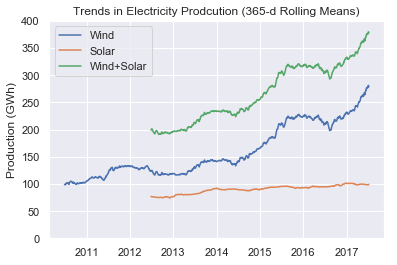

In [44]:
#Plot 365-day rolling mean times series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    
# Set x-ticks to yearly interval, adjust y-axis limits
## add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Prodcution (365-d Rolling Means)');